# Capstone assignment 2

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

#### Load data into dataframe

In [3]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup=BeautifulSoup(source,"html.parser")
table=soup.find_all('table')[0]

df = pd.read_html(str(table))
df=df[0]
df.head()


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### Remove "Not assigned" values

In [4]:
df = df[df.Borough != "Not assigned"]
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


#### Concatenate values belonging to the same postcode

In [5]:
l=df.Postcode
dft=df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(list)
dft=pd.DataFrame(data=dft)
dft['Neighbourhood']=dft["Neighbourhood"].str.join(", ")
dft.reset_index(level=(0,1), inplace=True)
dft.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


#### Check shape of dataframe dft

In [6]:
dft.shape # Shape of dataframe

(103, 3)

In [7]:
dfc=pd.read_csv('https://cocl.us/Geospatial_data') #Get coordinates of postcodes

#### Checking shape of dataframe dfc, it's the same

In [8]:
dfc.shape #checking shape, looks the same as dft

(103, 3)

#### All values True - Checking if postcode values in both datasets are in the same order, nice that they are.

In [9]:
np.unique(dft.Postcode==dfc["Postal Code"]) #All values True

array([ True])

#### Merge the two dataframes

In [10]:
df = pd.concat([dft, dfc], axis=1, join='inner') # Joining the two dataframes together.

# Finalised Table

In [11]:
del df["Postcode"] 


In [12]:
del df["Postal Code"]

In [13]:
df

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476
5,Scarborough,Scarborough Village,43.744734,-79.239476
6,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


#### Check unique values

In [14]:
df['Borough'].unique() # checking for misspellings etc

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

####  A partial search for 'Toronto'

In [15]:
df[df['Borough'].str.contains('Toronto', case=False)] #search for anything with 'Toronto or toronto in it'
toronto_data=df
toronto_data

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476
5,Scarborough,Scarborough Village,43.744734,-79.239476
6,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [158]:
df.columns

Index(['Borough', 'Neighbourhood', 'Latitude', 'Longitude'], dtype='object')

In [18]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### Longitude and lattitude for Toronto

In [21]:
CLIENT_ID = 'I2CICVVZ4TRAQCRSL4UTDKMH3PFIMXTXLRYRFBFR0G2LK0CF' # your Foursquare ID
CLIENT_SECRET = 'EBHQ41Z1JNGADSKS3RKIQYRYQZYYS23SH5YBJSPVMDZ13NDH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I2CICVVZ4TRAQCRSL4UTDKMH3PFIMXTXLRYRFBFR0G2LK0CF
CLIENT_SECRET:EBHQ41Z1JNGADSKS3RKIQYRYQZYYS23SH5YBJSPVMDZ13NDH


### Get location of Toronto using Geolocator

In [22]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Use foursquare to get location of nearby venues

In [23]:

neighbourhood_latitude=float(df[0:1].Latitude)
neighbourhood_longitude=float(df[0:1].Longitude)

radius=500 
LIMIT=100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)

In [24]:
results = requests.get(url).json()

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Get location of Venues

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056


### Same code but looped over all the neighbourhoods

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
toronto_venues = getNearbyVenues(names=df.Neighbourhood,
                                   latitudes=df.Latitude,
                                   longitudes=df.Longitude 
                                  )


Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [34]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,WIND Mobile,43.767034,-79.189861,Electronics Store
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
8,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
9,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot


In [35]:
toronto_venues.groupby('Neighborhood').count().head() #frequency of venues, grouped by Neighbourhood

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",11,11,11,11,11,11
"Alderwood, Long Branch",9,9,9,9,9,9


In [36]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


In [37]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="") #turn venue categories into dummy variables

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
toronto_onehot.shape

(2269, 268)

In [39]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index() # mean of the frequency of occurence of each category
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.0,0.000000,0.01
1,Agincourt,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
4,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.0,0.000000,0.00
6,Bayview Village,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
7,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
8,Berczy Park,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
9,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00


In [40]:
toronto_grouped.shape

(100, 268)

In [41]:
num_top_venues = 5 # Top 5 Venues in each neighbourhood/s

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2  Thai Restaurant  0.04
3              Bar  0.04
4            Hotel  0.03


----Agincourt----
                venue  freq
0        Skating Rink   0.2
1  Chinese Restaurant   0.2
2              Lounge   0.2
3      Breakfast Spot   0.2
4      Sandwich Place   0.2


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                             venue  freq
0                       Playground  0.33
1                      Coffee Shop  0.33
2                             Park  0.33
3                      Men's Store  0.00
4  Molecular Gastronomy Restaurant  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0           Pizza Place  0.18
1         Grocery Store  0.18
2              Pharmacy  0.09
3  Fast Food Restaurant  0.09
4   Fried Chicken Joint  0.09


----Alderwood,

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Thai Restaurant,Restaurant,American Restaurant,Hotel,Asian Restaurant,Bakery,Steakhouse
1,Agincourt,Chinese Restaurant,Lounge,Sandwich Place,Breakfast Spot,Skating Rink,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Coffee Shop,Park,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Pharmacy,Sandwich Place,Fried Chicken Joint,Beer Store,Fast Food Restaurant,Discount Store,Japanese Restaurant,Diner
4,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Coffee Shop,Pool,Pub,Sandwich Place,Pharmacy,Airport Service,Airport Terminal


### Using elbow method for optimal K

In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [48]:
toronto_grouped_clustering=toronto_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

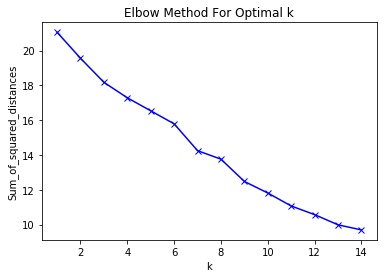

In [49]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimal K is 7 (my guess)

In [50]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [51]:
#del neighborhoods_venues_sorted['Cluster Labels']
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data.sort_values('Neighbourhood')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() #check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0.0,Coffee Shop,Café,Bar,Thai Restaurant,Restaurant,American Restaurant,Hotel,Asian Restaurant,Bakery,Steakhouse
12,Scarborough,Agincourt,43.794200,-79.262029,0.0,Chinese Restaurant,Lounge,Sandwich Place,Breakfast Spot,Skating Rink,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
14,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,2.0,Playground,Coffee Shop,Park,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
101,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,0.0,Grocery Store,Pizza Place,Pharmacy,Sandwich Place,Fried Chicken Joint,Beer Store,Fast Food Restaurant,Discount Store,Japanese Restaurant,Diner
89,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.0,Pizza Place,Gym,Skating Rink,Coffee Shop,Pool,Pub,Sandwich Place,Pharmacy,Airport Service,Airport Terminal


In [52]:
toronto_merged.dropna(how='any',inplace=True) #there were some NaN values that affected the results.

In [53]:
toronto_merged['Cluster Labels'].unique() #Checking that no NaN values are part of the cluster labels

array([0., 2., 3., 5., 1., 6., 4.])

# The Map

In [54]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters) 
map_clusters

# A look at each cluster

In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Thai Restaurant,Restaurant,American Restaurant,Hotel,Asian Restaurant,Bakery,Steakhouse
12,Agincourt,Chinese Restaurant,Lounge,Sandwich Place,Breakfast Spot,Skating Rink,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
101,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Pharmacy,Sandwich Place,Fried Chicken Joint,Beer Store,Fast Food Restaurant,Discount Store,Japanese Restaurant,Diner
89,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Coffee Shop,Pool,Pub,Sandwich Place,Pharmacy,Airport Service,Airport Terminal
28,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Middle Eastern Restaurant,Chinese Restaurant,Sushi Restaurant,Bank,Fast Food Restaurant,Deli / Bodega,Sandwich Place,Fried Chicken Joint,Frozen Yogurt Shop
19,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Women's Store
62,"Bedford Park, Lawrence Manor East",Thai Restaurant,Coffee Shop,Italian Restaurant,Juice Bar,Boutique,Liquor Store,Sandwich Place,Butcher,Fast Food Restaurant,Indian Restaurant
56,Berczy Park,Coffee Shop,Seafood Restaurant,Steakhouse,Italian Restaurant,Bakery,Café,Cocktail Bar,Beer Bar,Cheese Shop,Farmers Market
9,"Birch Cliff, Cliffside West",Café,College Stadium,Skating Rink,General Entertainment,Women's Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
95,"Bloordale Gardens, Eringate, Markland Wood, Ol...",Pharmacy,Convenience Store,Liquor Store,Beer Store,Shopping Plaza,Café,Pet Store,Coffee Shop,Pizza Place,College Rec Center


In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"Newtonbrook, Willowdale",Home Service,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Dance Studio


In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Coffee Shop,Park,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
30,"CFB Toronto, Downsview East",Construction & Landscaping,Park,Airport,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
74,Caledonia-Fairbanks,Park,Women's Store,Fast Food Restaurant,Market,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
7,"Clairlea, Golden Mile, Oakridge",Bakery,Bus Line,Park,Bus Station,Fast Food Restaurant,Intersection,Soccer Field,Concert Hall,Dim Sum Restaurant,Electronics Store
31,Downsview West,Grocery Store,Convenience Store,Park,Hotel,Bank,Shopping Mall,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
79,"Downsview, North Park, Upwood Park",Construction & Landscaping,Park,Bakery,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Women's Store
40,East Toronto,Coffee Shop,Park,Convenience Store,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
72,Glencairn,Pub,Japanese Restaurant,Park,Bakery,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Women's Store
96,Humber Summit,Construction & Landscaping,Empanada Restaurant,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
100,"Kingsview Village, Martin Grove Gardens, Richv...",Pizza Place,Park,Bus Line,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run


In [59]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Downsview Central,Baseball Field,Food Truck,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store,Ethiopian Restaurant
97,"Emery, Humberlea",Baseball Field,Doner Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Women's Store,Event Space
91,"Humber Bay, King's Mill Park, Kingsway Park So...",Baseball Field,Deli / Bodega,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Event Space,Doner Restaurant


In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,"Silver Hills, York Mills",Cafeteria,Curling Ice,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Discount Store


In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Highland Creek, Rouge Hill, Port Union",Bar,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Event Space


In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Roselawn,Garden,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Curling Ice
